# Internal test

23AIML056 - Kavya

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv('Datasets/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- our target feature is price
- rest of the features are training parameters

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [50]:
object_columns = []
for col in df.columns:
    if df[col].dtype == "object":
        object_columns.append(col)

print(f'object columns: {object_columns}')

object columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [51]:
binary_cols = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
]
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({"yes": 1, "no": 0}))

le = LabelEncoder()
df["furnishingstatus"] = le.fit_transform(df["furnishingstatus"])

print("--- After Label Encoding ---")
print(df.head())

--- After Label Encoding ---
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0

In [52]:
X = df.drop("price", axis=1)
y = df["price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
numerical_columns = ["area", "bedrooms", "bathrooms", "stories", "parking"]

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

print("\n--- After Scaling (Training Set Head) ---")
print(X_train.head())


--- After Scaling (Training Set Head) ---
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
46   0.384168  0.055271   1.539173  2.587644         1          0         0   
93   0.929181  0.055271   1.539173 -0.912499         1          0         1   
335 -0.607755 -1.283514  -0.557950 -0.912499         1          0         1   
412 -1.155492  0.055271  -0.557950  0.254215         1          0         1   
471 -0.637730  0.055271  -0.557950  0.254215         1          0         0   

     hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  
46                 0                1  0.367957         0                 0  
93                 0                1  2.709987         0                 1  
335                0                1  1.538972         0                 0  
412                0                0 -0.803059         1                 2  
471                0                0 -0.803059         0                 2  


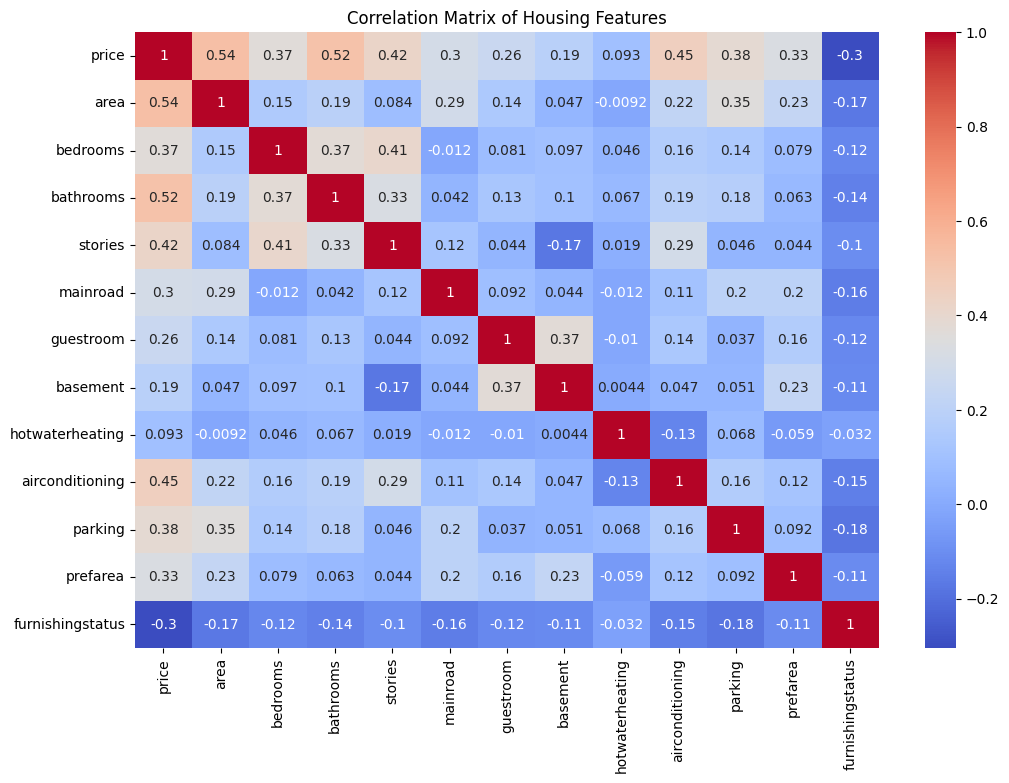

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Housing Features")
plt.show()

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [56]:
from sklearn.metrics import *

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=3)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R2 Score': r2, 'RMSE': rmse, 'MSE': mse}
    print(f"{name}: \nR2 Score = {r2:.4f}, RMSE = {rmse:.2f}, MSE = {mse:.2f}")

results_df = pd.DataFrame(results).T
results_df

Linear Regression: 
R2 Score = 0.6495, RMSE = 1331071.42, MSE = 1771751116594.04
Decision Tree: 
R2 Score = 0.4682, RMSE = 1639566.30, MSE = 2688177649082.57
Random Forest: 
R2 Score = 0.6116, RMSE = 1401084.63, MSE = 1963038128581.47
KNN: 
R2 Score = 0.5968, RMSE = 1427653.36, MSE = 2038194107844.04


,R2 Score,RMSE,MSE
Linear Regression,0.649475,1.331071e+06,1.771751e+12
Decision Tree,0.468169,1.639566e+06,2.688178e+12
Random Forest,0.611631,1.401085e+06,1.963038e+12
KNN,0.596762,1.427653e+06,2.038194e+12


In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [58]:
predicted_df = pd.DataFrame(
    {
        'Actual Value': y_test.values,
        'Predicted Value': y_pred
    }
)
predicted_df.head()

,Actual Value,Predicted Value
0,4060000,5.203692e+06
1,6650000,7.257004e+06
2,3710000,3.062829e+06
3,6440000,4.559592e+06
4,2800000,3.332932e+06


In [59]:
predicted_df.to_csv('Predicted_Values.csv', index=False)